Primeiramente, construíremos uma funçao que calcula a regressao do zero, apenas com pandas e matplotlib


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats





In [77]:
def regressao(df):
    """ dataframe -> float, float, dataframe
    Recebe um dataframe com duas colunas, X e Y, e devolve os coeficientes da regressão linear para Y=a*X + b e o dataframe com o modelo aplicado
    retorna a, b, modelo
    """
    slope=df.cov()["X"][1]/df.var(0, ddof=0)[0]
    intercept=df.mean()[1] -  slope*df.mean()[0]
    model= pd.DataFrame()
    model["X"]= df.X 
    model["Y"]= df.X*slope + intercept
    e= df.Y - model.Y
    r = 1 - (e.var(ddof=0)/df.Y.var(ddof=0))


    return slope,intercept, model, r

def fazgrafico(df, modelo):
    """recebe dataframe original e modelo e faz os gráficos"""
    plt.scatter(df.X, df.Y)
    plt.plot(modelo.X, modelo.Y)
    
    

Exemplo:

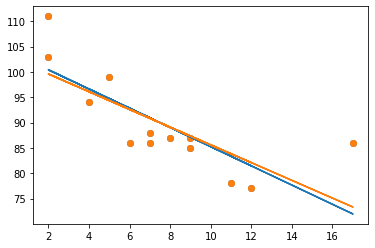

-0.758591524376155 0.5714648432105096


In [78]:
#exemplo 1
df=pd.DataFrame({'X': [5, 4], 
              'Y': [8, 2]},)



a, b, modelo, r= regressao(df)
#fazgrafico(df,modelo)



#exemplo 2

df2=pd.DataFrame({"X" : [5,7,8,7,2,17,2,9,4,11,12,9,6],
"Y" : [99,86,87,88,111,86,103,87,94,78,77,85,86]})
a,b,modelo2, r2=regressao(df2)
fazgrafico(df2,modelo2)

#utilizando a função de regressão do scipy

slope, intercept, r, p, std_err = stats.linregress(df2.X, df2.Y)
def makemodel(x):
  return slope * x + intercept

mymodel = list(map(makemodel, df2.X))

plt.scatter(df2.X, df2.Y)
plt.plot(df2.X, mymodel)
plt.show()
print(r,r2)
